In [1]:
from nrc import NoisyRingsClustering
from nrc.datagen import random_circles
import numpy as np
import sys

sys.path.append("..")

In [59]:
center_delims = np.array([[-500, -500], [-500, 500], [500, -500], [500, 500]])
minmax_radius = np.array([200, 300])
n_rings = 2
circles = random_circles(center_delims, minmax_radius, 100, n_rings, noise=0.3)

[[-221.93001891 -247.06792619]
 [-126.17981901 -423.60251633]]


In [60]:
import matplotlib.pyplot as plt

In [61]:
model = NoisyRingsClustering(n_rings=n_rings, q=1.2)
model.fit(circles)


INFO:root:Converged after 9 iterations. Stopping early.


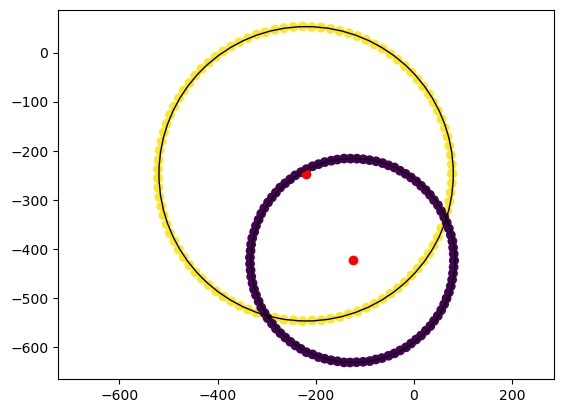

In [62]:
radii, centers, memberships = model.get_hard_labels()

plt.scatter(circles[:, 0], circles[:, 1], c=memberships)
plt.scatter(centers[:, 0], centers[:, 1], c="red")
plt.axis("equal")
# draw circle with radius
for i in range(len(radii)):
    circle = plt.Circle(centers[i], radii[i], fill=False)
    plt.gca().add_artist(circle)

plt.show()
